## cut (binning) and category 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
pd.__version__

'1.1.3'

In [2]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/staff.csv',
                index_col = 'empID',
                thousands=',', parse_dates=['dob', 'join_date'])
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fname       12 non-null     object        
 1   lname       12 non-null     object        
 2   sex         12 non-null     object        
 3   dob         12 non-null     datetime64[ns]
 4   position    12 non-null     object        
 5   department  12 non-null     object        
 6   salary      12 non-null     int64         
 7   join_date   12 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 864.0+ bytes


In [8]:
from pandas.api.types import CategoricalDtype
salary_bucket = ['0-15,000', '15,001-30,000', '30,001-50,000', '50,001-80,000', '80,000+']
df['salary_group'] = pd.cut(df.salary,
                           bins = [0, 15000, 30000, 50000, 80000, np.inf],
                           labels = salary_bucket,
                           right = True).astype(CategoricalDtype(salary_bucket, ordered = True))
df.sort_values(by = 'salary_group')

,fname,lname,sex,dob,position,department,salary,join_date,salary_group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,"15,001-30,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000"


In [9]:
df.salary_group

empID
604         0-15,000
607    30,001-50,000
486    15,001-30,000
229    30,001-50,000
901          80,000+
944    30,001-50,000
405    30,001-50,000
665    15,001-30,000
41     30,001-50,000
171    15,001-30,000
51           80,000+
724    50,001-80,000
Name: salary_group, dtype: category
Categories (5, object): ['0-15,000' < '15,001-30,000' < '30,001-50,000' < '50,001-80,000' < '80,000+']

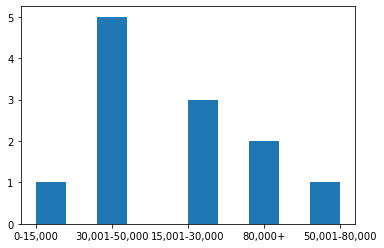

In [11]:
df.salary_group.hist(grid=False);

In [13]:
pd.to_datetime('today').year

2021

In [15]:
df['age'] = pd.to_datetime('today').year - df.dob.dt.year
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",27
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",53
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",34
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",30
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",47
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",46
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",58
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",38
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",34


In [19]:
age_cat = ['18-25', '26-30', '31-40', '41-50', '51+']
df['age_group'] = pd.cut(df.age,
                        bins = [18, 25, 30, 40, 50, np.inf],
                        labels = age_cat,
                        right=True,
                        include_lowest=True).astype(CategoricalDtype(age_cat, ordered=True))
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group
empID,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",27,26-30
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",53,51+
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",34,31-40
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",30,26-30
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",47,41-50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",46,41-50
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",58,51+
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",38,31-40
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",34,31-40


In [18]:
df.age_group

empID
604    26-30
607      51+
486    31-40
229    26-30
901    41-50
944    41-50
405      51+
665    31-40
41     31-40
171      51+
51     41-50
724    31-40
Name: age_group, dtype: category
Categories (5, object): ['18-25' < '26-30' < '31-40' < '41-50' < '51+']

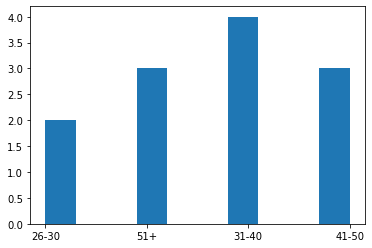

In [21]:
df.age_group.hist(grid=False);

In [22]:
from IPython.display import IFrame
IFrame("https://matplotlib.org/stable/gallery/color/named_colors.html", width=800, height=800)

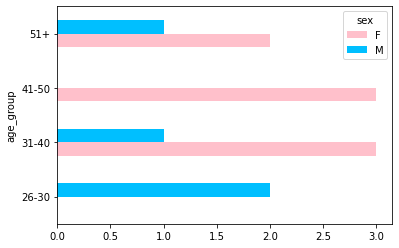

In [24]:
pd.crosstab(df.age_group, df.sex).plot(kind = 'barh', color = ['pink', 'deepskyblue']);

In [25]:
from IPython.display import IFrame
IFrame("https://www.careerplanner.com/Career-Articles/Generations.cfm", width=800, height=800)

In [26]:
df.dob.dt.year

empID
604    1994
607    1968
486    1987
229    1991
901    1974
944    1975
405    1963
665    1983
41     1987
171    1962
51     1972
724    1983
Name: dob, dtype: int64

In [27]:
def gen(birthdate):
    '''born in generation'''
    y = birthdate.year
    if 1946 <= y <= 1964:
        return 'Baby Boomer'
    elif 1965 <= y <= 1979:
        return 'Gen X'
    elif 1980 <= y <= 1994:
        return 'Gen Y'
    elif 1995 <= y <= 2012:
        return 'Gen Z'
    else:
        return 'Gen Alpha'

In [28]:
df['gen'] = df.dob.map(lambda d: gen(d)).astype(CategoricalDtype(
                                                categories = ['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Gen Alpha'],
                                                ordered=True))
df                                            

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group,gen
empID,,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",27,26-30,Gen Y
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",53,51+,Gen X
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",34,31-40,Gen Y
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",30,26-30,Gen Y
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",47,41-50,Gen X
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",46,41-50,Gen X
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",58,51+,Baby Boomer
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",38,31-40,Gen Y
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",34,31-40,Gen Y


In [29]:
df[['age', 'age_group', 'gen']].sort_values('gen')

,age,age_group,gen
empID,,,
405,58,51+,Baby Boomer
171,59,51+,Baby Boomer
607,53,51+,Gen X
901,47,41-50,Gen X
944,46,41-50,Gen X
51,49,41-50,Gen X
604,27,26-30,Gen Y
486,34,31-40,Gen Y
229,30,26-30,Gen Y


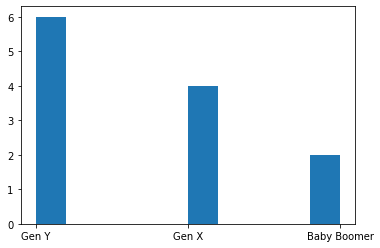

In [30]:
df.gen.hist(grid=False);